In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("C://Users/anush/Desktop/ObesityDataSet_raw_and_data_sinthetic.csv")



In [17]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [19]:
# Summary statistics for continuous variables
continuous_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP']
summary_stats = df[continuous_vars].describe()
print("Summary Statistics for Continuous Variables:")
print(summary_stats)


Summary Statistics for Continuous Variables:
               Age       Height       Weight         FCVC          NCP
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000
mean     24.312600     1.701677    86.586058     2.419043     2.685628
std       6.345968     0.093305    26.191172     0.533927     0.778039
min      14.000000     1.450000    39.000000     1.000000     1.000000
25%      19.947192     1.630000    65.473343     2.000000     2.658738
50%      22.777890     1.700499    83.000000     2.385502     3.000000
75%      26.000000     1.768464   107.430682     3.000000     3.000000
max      61.000000     1.980000   173.000000     3.000000     4.000000


In [21]:
# Proportions for categorical variables
categorical_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE']
proportions = df[categorical_vars].apply(lambda x: x.value_counts(normalize=True))
print("\nProportions for Categorical Variables:")
print(proportions)


Proportions for Categorical Variables:
              Gender  family_history_with_overweight      FAVC      CAEC  \
Always           NaN                             NaN       NaN  0.025107   
Female      0.494079                             NaN       NaN       NaN   
Frequently       NaN                             NaN       NaN  0.114638   
Male        0.505921                             NaN       NaN       NaN   
Sometimes        NaN                             NaN       NaN  0.836097   
no               NaN                        0.182378  0.116059  0.024159   
yes              NaN                        0.817622  0.883941       NaN   

               SMOKE  
Always           NaN  
Female           NaN  
Frequently       NaN  
Male             NaN  
Sometimes        NaN  
no          0.979157  
yes         0.020843  


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


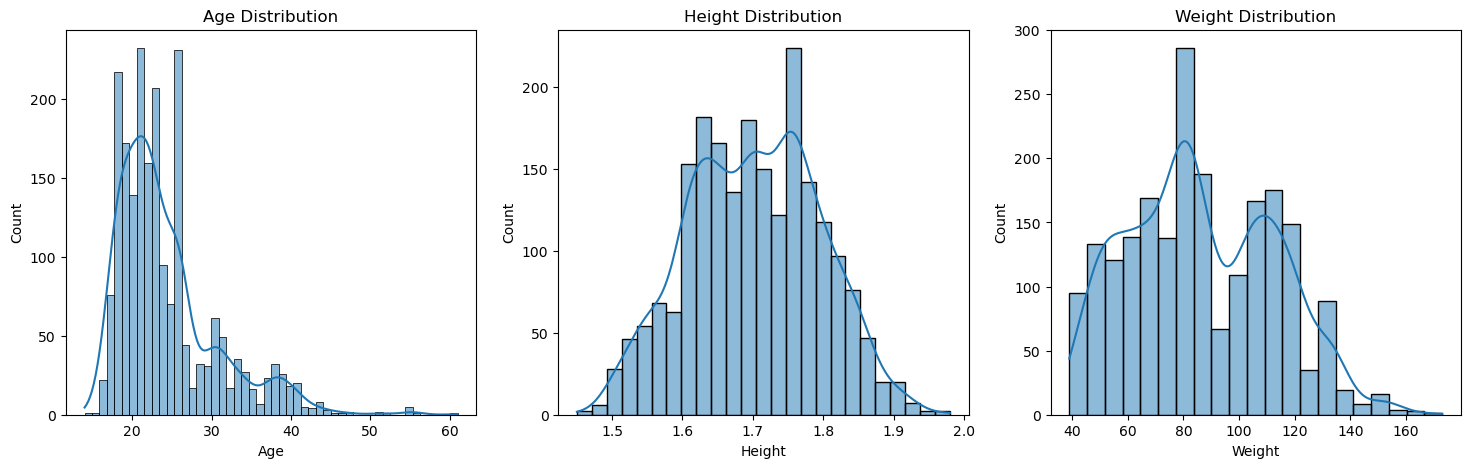

In [23]:
# Distributions of Age, Height, Weight
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Age'], kde=True, ax=axes[0]).set_title('Age Distribution')
sns.histplot(df['Height'], kde=True, ax=axes[1]).set_title('Height Distribution')
sns.histplot(df['Weight'], kde=True, ax=axes[2]).set_title('Weight Distribution')
plt.show()


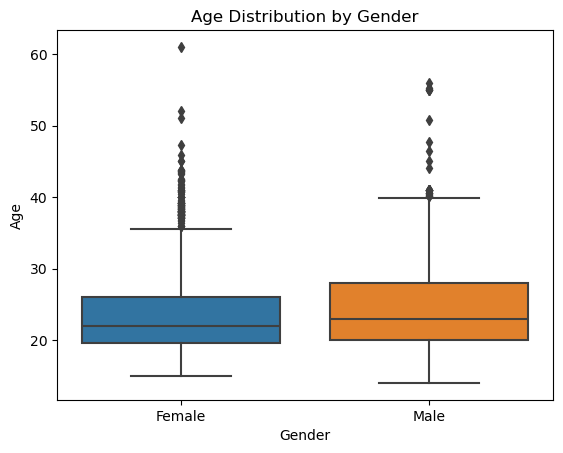

In [25]:
# Compare Age distribution between genders
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age Distribution by Gender')
plt.show()


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'int' object has no attribute 'startswith'

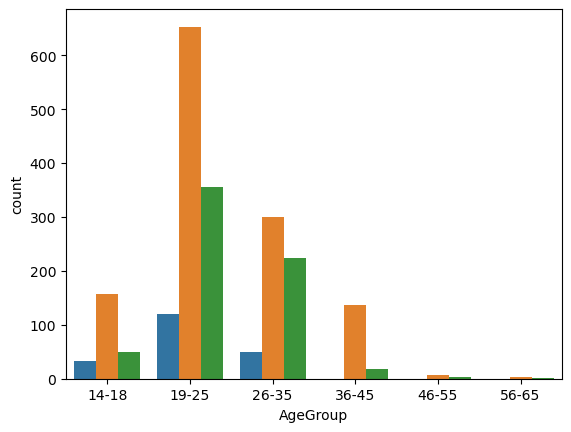

In [51]:

# Create age groups with appropriate bin sizes
df['AgeGroup'] = pd.cut(df['Age'], bins=[14, 18, 25, 35, 45, 55, 65], labels=['14-18', '19-25', '26-35', '36-45', '46-55', '56-65'])

# Ensure FCVC is of integer type and then convert it to categorical
df['FCVC'] = df['FCVC'].astype(int).astype('category')

# Drop rows with NaN values in AgeGroup or FCVC for plotting
plot_data = df.dropna(subset=['AgeGroup', 'FCVC'])

# Plot frequency of vegetable consumption (FCVC) by age group
sns.countplot(x='AgeGroup', hue='FCVC', data=plot_data, hue_order=sorted(df['FCVC'].unique()))
plt.title('Frequency of Vegetable Consumption by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='FCVC')
plt.show()


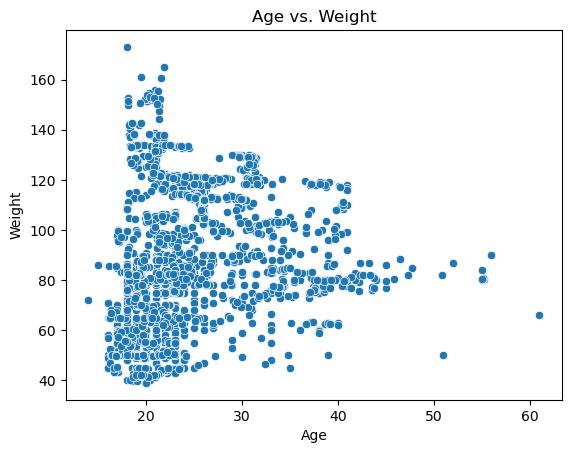

In [35]:
# Scatter plot of Age vs. Weight
sns.scatterplot(x='Age', y='Weight', data=df)
plt.title('Age vs. Weight')
plt.show()


Text(0.5, 1.0, 'TUE Distribution by MTRANS')

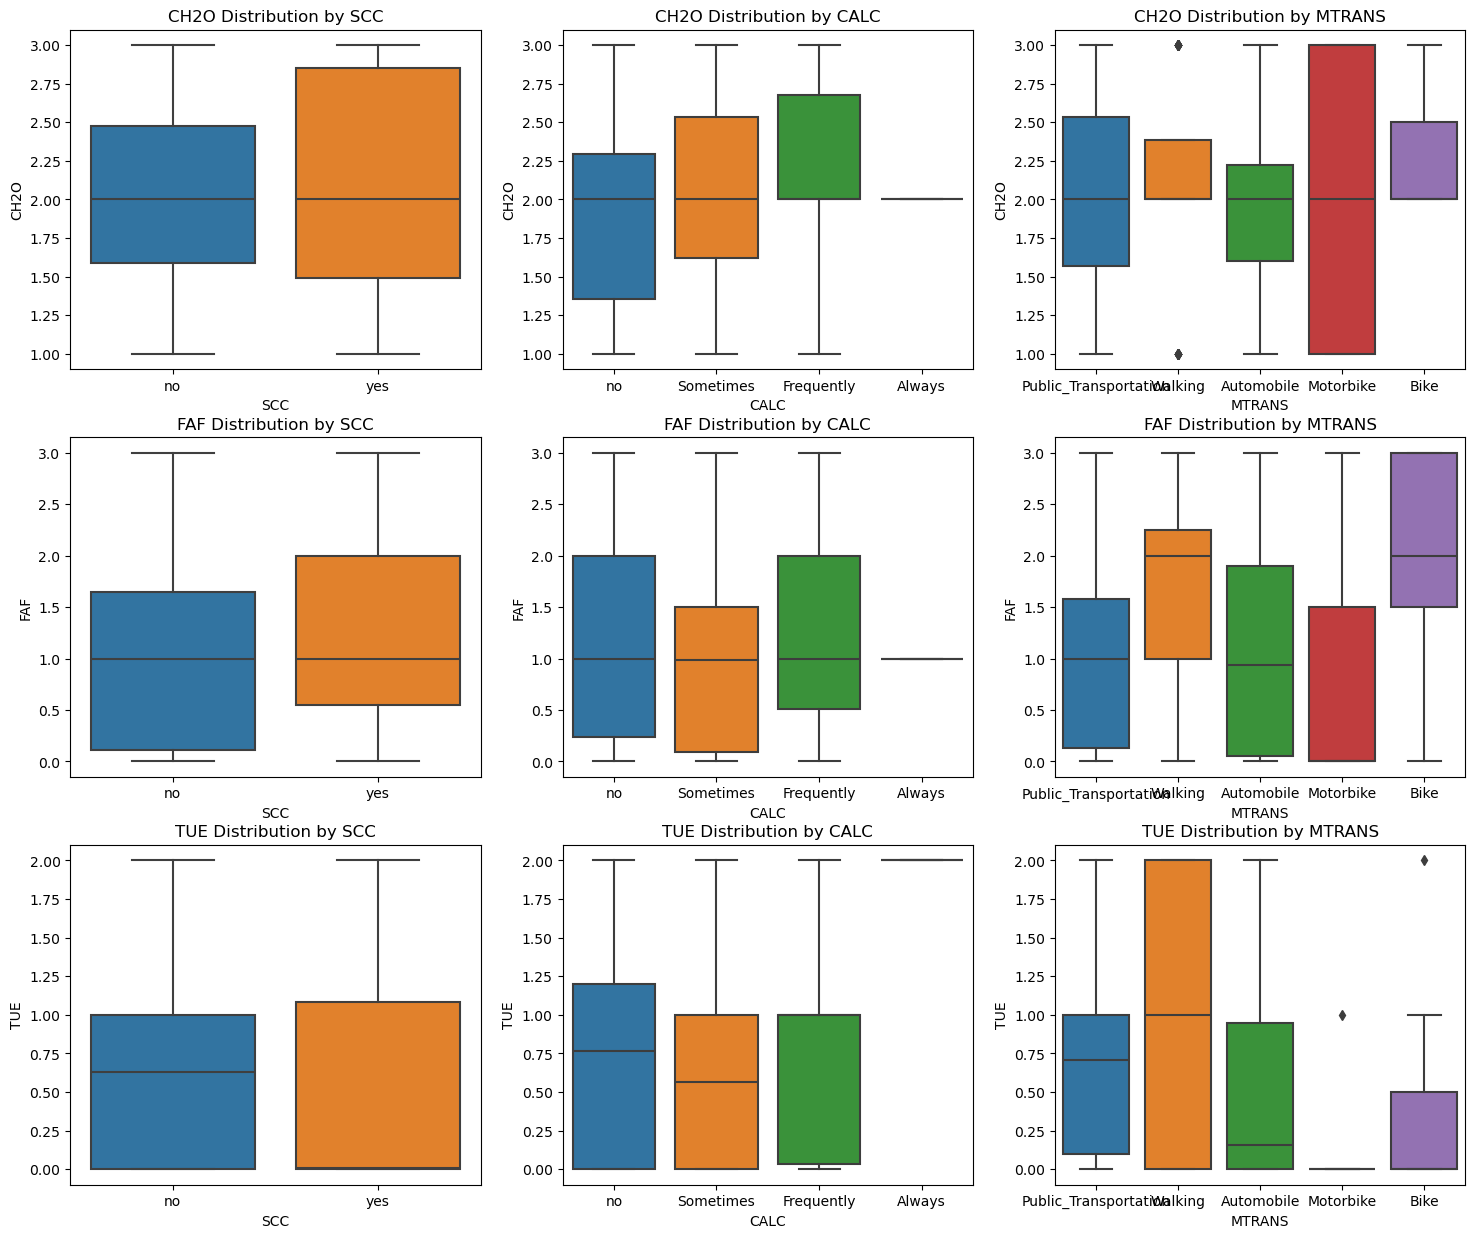

In [41]:
# Distributions of CH2O, FAF, TUE across SCC, CALC, MTRANS
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
sns.boxplot(x='SCC', y='CH2O', data=df, ax=axes[0, 0])
axes[0, 0].set_title('CH2O Distribution by SCC')
sns.boxplot(x='CALC', y='CH2O', data=df, ax=axes[0, 1])
axes[0, 1].set_title('CH2O Distribution by CALC')
sns.boxplot(x='MTRANS', y='CH2O', data=df, ax=axes[0, 2])
axes[0, 2].set_title('CH2O Distribution by MTRANS')

sns.boxplot(x='SCC', y='FAF', data=df, ax=axes[1, 0])
axes[1, 0].set_title('FAF Distribution by SCC')
sns.boxplot(x='CALC', y='FAF', data=df, ax=axes[1, 1])
axes[1, 1].set_title('FAF Distribution by CALC')
sns.boxplot(x='MTRANS', y='FAF', data=df, ax=axes[1, 2])
axes[1, 2].set_title('FAF Distribution by MTRANS')

sns.boxplot(x='SCC', y='TUE', data=df, ax=axes[2, 0])
axes[2, 0].set_title('TUE Distribution by SCC')
sns.boxplot(x='CALC', y='TUE', data=df, ax=axes[2, 1])
axes[2, 1].set_title('TUE Distribution by CALC')
sns.boxplot(x='MTRANS', y='TUE', data=df, ax=axes[2, 2])
axes[2, 2].set_title('TUE Distribution by MTRANS')



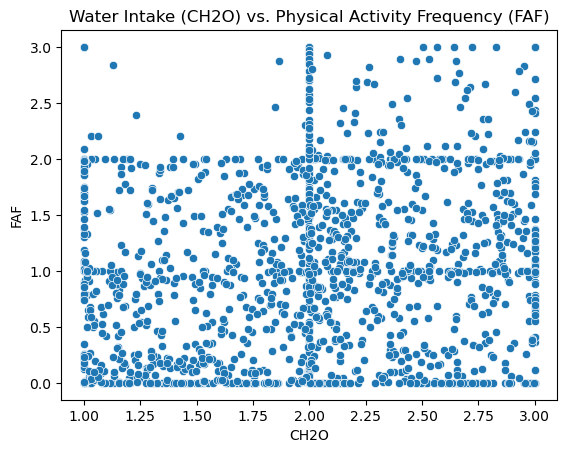

In [43]:
# Investigate relationships: Does higher water intake correlate with higher physical activity frequency?
sns.scatterplot(x='CH2O', y='FAF', data=df)
plt.title('Water Intake (CH2O) vs. Physical Activity Frequency (FAF)')
plt.show()

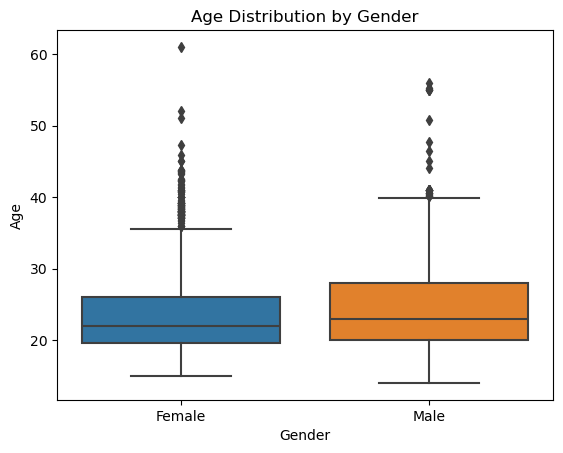

In [55]:
# How does Age vary across different genders?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Gender' and 'Age' are columns in df
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age Distribution by Gender')
plt.show()


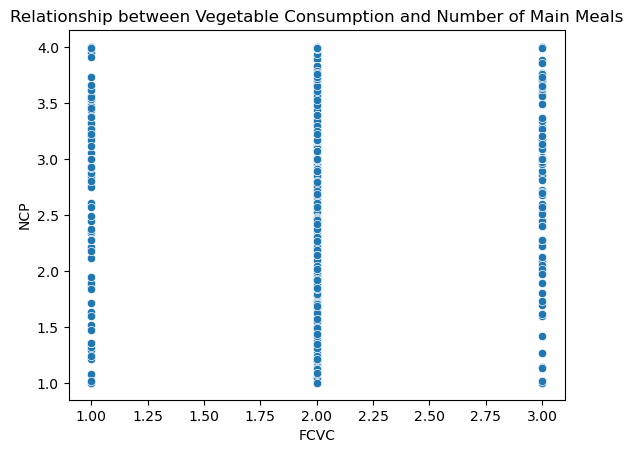

Correlation between FCVC and NCP: 0.06757467202228953


In [57]:
# Is there a relationship between vegetable consumption (FCVC) and the number of main meals (NCP)?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'FCVC' and 'NCP' are columns in df
sns.scatterplot(x='FCVC', y='NCP', data=df)
plt.title('Relationship between Vegetable Consumption and Number of Main Meals')
plt.show()

# Calculate correlation coefficient
correlation = df[['FCVC', 'NCP']].corr().iloc[0, 1]
print(f'Correlation between FCVC and NCP: {correlation}')



family_history_with_overweight   no   yes
SMOKE                                    
no                              379  1688
yes                               6    38


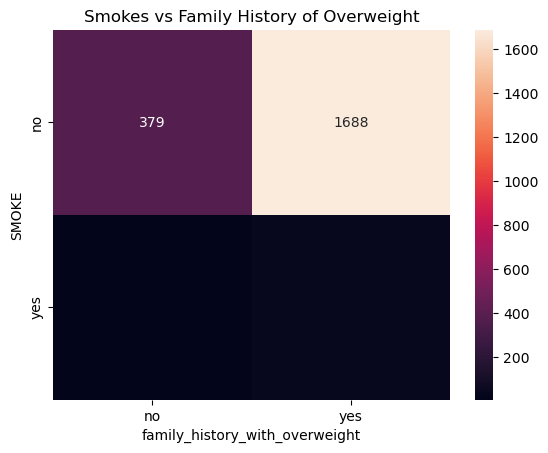

Chi-square test p-value: 0.547493490797314


In [87]:
 # Are individuals who smoke more likely to have a family history of overweight?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Check if the required columns exist
if 'SMOKE' in df.columns and 'family_history_with_overweight' in df.columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df['SMOKE'], df['family_history_with_overweight'])
    print(contingency_table)
    
    # Plot the heatmap
    sns.heatmap(contingency_table, annot=True, fmt='d')
    plt.title('Smokes vs Family History of Overweight')
    plt.show()
    
    # Perform Chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'Chi-square test p-value: {p}')
else:
    print("Required columns are missing in the DataFrame.")



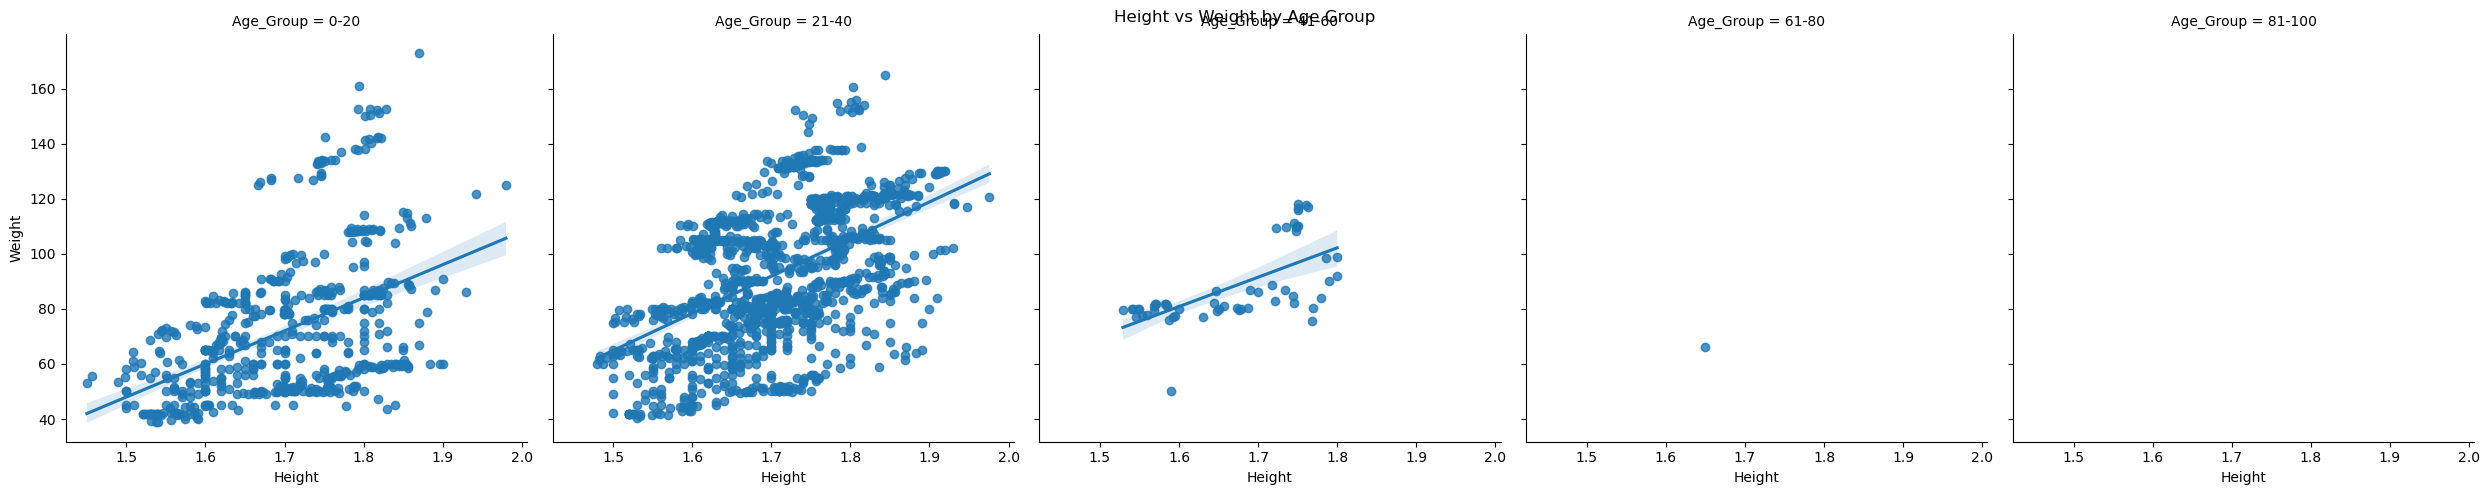

Correlation in age group 21-40: 0.503040326647049
Correlation in age group 41-60: 0.6351814632833015
Correlation in age group 0-20: 0.4592562143088569
Correlation in age group 61-80: nan


In [67]:
# How do height and weight correlate across different age groups?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Age', 'Height', and 'Weight' are columns in df
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

sns.lmplot(x='Height', y='Weight', col='Age_Group', data=df)
plt.suptitle('Height vs Weight by Age Group')
plt.show()

# Calculate correlation by age group
for group in df['Age_Group'].unique():
    subset = df[df['Age_Group'] == group]
    correlation = subset[['Height', 'Weight']].corr().iloc[0, 1]
    print(f'Correlation in age group {group}: {correlation}')


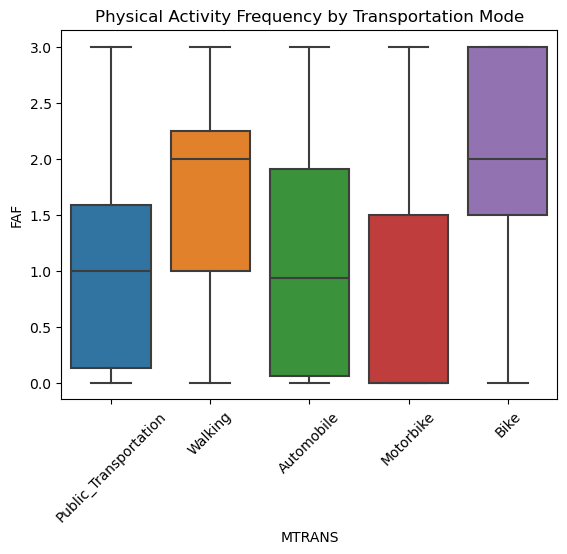

ANOVA test p-value: 2.986411473466796e-07


In [69]:
#  How does the frequency of physical activity (FAF) vary among different transportation modes (MTRANS)?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'FAF' and 'MTRANS' are columns in df
sns.boxplot(x='MTRANS', y='FAF', data=df)
plt.title('Physical Activity Frequency by Transportation Mode')
plt.xticks(rotation=45)
plt.show()

# ANOVA test (if MTRANS is categorical)
from scipy.stats import f_oneway
transport_modes = df['MTRANS'].unique()
faf_by_mode = [df[df['MTRANS'] == mode]['FAF'] for mode in transport_modes]
f_stat, p_value = f_oneway(*faf_by_mode)
print(f'ANOVA test p-value: {p_value}')


Correlation between TUE and NObeyesdad: -0.06944759786478219


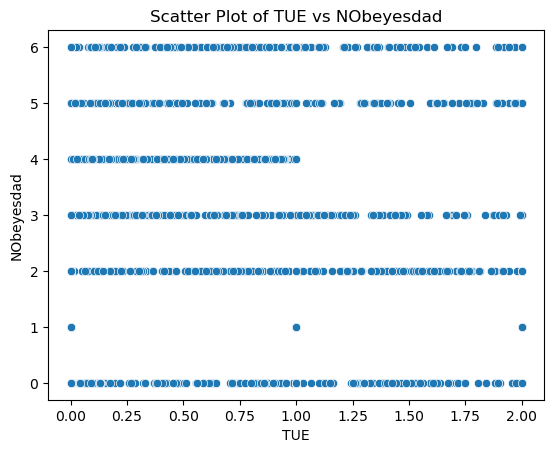

In [77]:
# Is there a relationship between technological device use (TUE) and obesity levels (NObeyesdad)?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your DataFrame (replace with your actual data loading code)
# df = pd.read_csv('your_dataset.csv')

# Clean column names by stripping any extra whitespace
df.columns = df.columns.str.strip()

# Check if the required columns exist for the analysis
if 'TUE' in df.columns and 'NObeyesdad' in df.columns:
    # Convert 'NObeyesdad' to numeric encoding if it's categorical
    if df['NObeyesdad'].dtype == 'object':
        label_encoder = LabelEncoder()
        df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])
    
    # Ensure 'TUE' is numeric, force non-convertible values to NaN
    df['TUE'] = pd.to_numeric(df['TUE'], errors='coerce')
    
    # Drop rows with NaN values in either column
    df_clean = df.dropna(subset=['TUE', 'NObeyesdad'])
    
    if not df_clean.empty:
        # Calculate correlation
        correlation = df_clean[['TUE', 'NObeyesdad']].corr().iloc[0, 1]
        print(f'Correlation between TUE and NObeyesdad: {correlation}')
        
        # Plot the data
        sns.scatterplot(data=df_clean, x='TUE', y='NObeyesdad')
        plt.title('Scatter Plot of TUE vs NObeyesdad')
        plt.xlabel('TUE')
        plt.ylabel('NObeyesdad')
        plt.show()
    else:
        print("No valid data available for correlation analysis.")
else:
    print("Required columns are missing.")



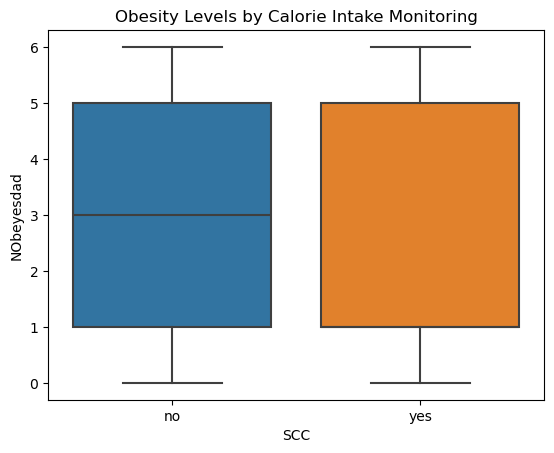

T-test p-value: nan


In [79]:
 # Do individuals who monitor their calorie intake (SCC) tend to have different obesity levels compared to those who do not?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Assuming 'SCC' and 'NObeyesdad' are columns in df
monitoring = df[df['SCC'] == 'Yes']['NObeyesdad']
not_monitoring = df[df['SCC'] == 'No']['NObeyesdad']

sns.boxplot(x='SCC', y='NObeyesdad', data=df)
plt.title('Obesity Levels by Calorie Intake Monitoring')
plt.show()

# T-test
t_stat, p_value = ttest_ind(monitoring, not_monitoring)
print(f'T-test p-value: {p_value}')



In [83]:
# How does alcohol consumption frequency (CALC) relate to water intake (CH2O) and its impact on obesity levels?
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Load your DataFrame (replace with your actual data loading code)
# df = pd.read_csv('your_dataset.csv')

# Clean column names by stripping any extra whitespace
df.columns = df.columns.str.strip()

# Ensure 'TUE' and 'NObeyesdad' columns exist
if 'TUE' in df.columns and 'NObeyesdad' in df.columns:
    # Convert 'NObeyesdad' to numeric encoding if it's categorical
    if df['NObeyesdad'].dtype == 'object':
        label_encoder = LabelEncoder()
        df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])
    
    # Ensure 'TUE' is numeric, force non-convertible values to NaN
    df['TUE'] = pd.to_numeric(df['TUE'], errors='coerce')
    
    # Drop rows with NaN values in either column
    df_clean = df.dropna(subset=['TUE', 'NObeyesdad'])
    
    if not df_clean.empty:
        # Define independent variable (X) and dependent variable (y)
        X = df_clean[['TUE']]
        X = sm.add_constant(X)  # Add constant term for intercept
        y = df_clean['NObeyesdad']
        
        # Fit OLS regression model
        model = sm.OLS(y, X).fit()
        print(model.summary())
    else:
        print("No valid data available for regression analysis.")
else:
    print("Required columns are missing.")


                            OLS Regression Results                            
Dep. Variable:             NObeyesdad   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     10.22
Date:                Thu, 25 Jul 2024   Prob (F-statistic):            0.00141
Time:                        12:03:24   Log-Likelihood:                -4401.8
No. Observations:                2111   AIC:                             8808.
Df Residuals:                    2109   BIC:                             8819.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1621      0.062     50.660      0.0